In [1]:
# I. Выберите два алгоритма (интересных вам и не рассмотренных в курсе) из
# вышеперечисленных разделов книги.

# The algorithms of Kruskal and Prim

# II. Проанализируйте выбранные алгоритмы с точки зрения временной и
# пространственной сложности, используемых методов проектирования и т.д.
# Реализуйте алгоритмы и проведите несколько экспериментов.
# Проанализируйте результаты.



In [2]:
import networkx as nx
from networkx.generators.random_graphs import *
import numpy as np

n = 100
p = 400
big_graph = dense_gnm_random_graph(n, p)

for u,v,w in big_graph.edges(data=True):
     w['weight'] = np.random.randint(1,15)
        
matrix = nx.adjacency_matrix(big_graph).todense()


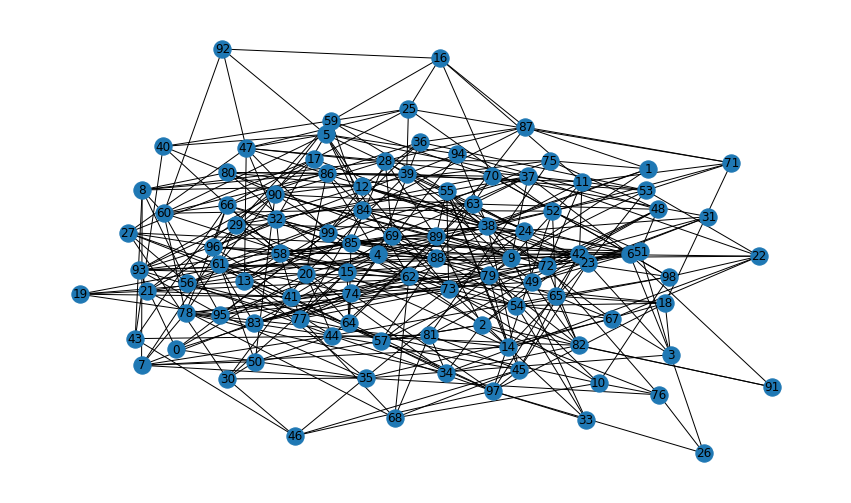

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 9))

pos_big = nx.spring_layout(big_graph)
nx.draw(big_graph, ax=ax, with_labels=True, pos=pos_big)


In [4]:
small_graph = dense_gnm_random_graph(10, 20)
matrix_small = nx.adjacency_matrix(small_graph).todense()

for u,v,w in small_graph.edges(data=True):
     w['weight'] = np.random.randint(1,15)

pos_small=nx.spring_layout(small_graph)

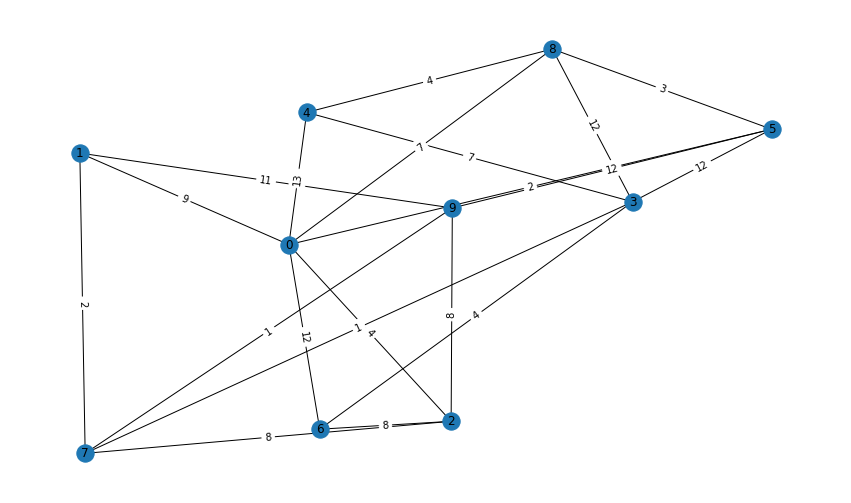

In [5]:
fig, ax = plt.subplots(figsize=(15, 9))
nx.draw(small_graph, ax=ax, with_labels=True, pos=pos_small)
labels = nx.get_edge_attributes(small_graph,'weight')
nx.draw_networkx_edge_labels(small_graph,pos_small,edge_labels=labels)
plt.savefig("lab_8_small_graph.png")

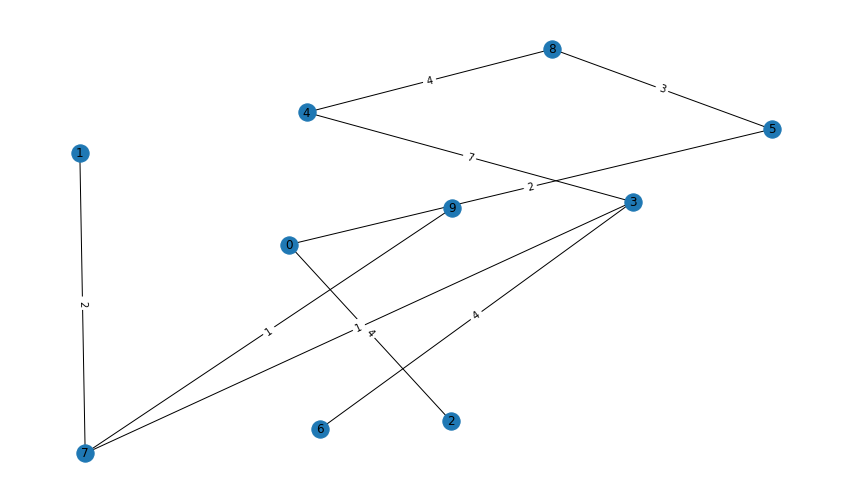

In [6]:
# T=nx.minimum_spanning_tree(small_graph)

def plot_tree(T, pos):
    fig, ax = plt.subplots(figsize=(15, 9))
    nx.draw(T, ax=ax, with_labels=True, pos=pos)
    labels = nx.get_edge_attributes(T,'weight')
    nx.draw_networkx_edge_labels(T,pos,edge_labels=labels)
plot_tree(nx.minimum_spanning_tree(small_graph), pos_small)

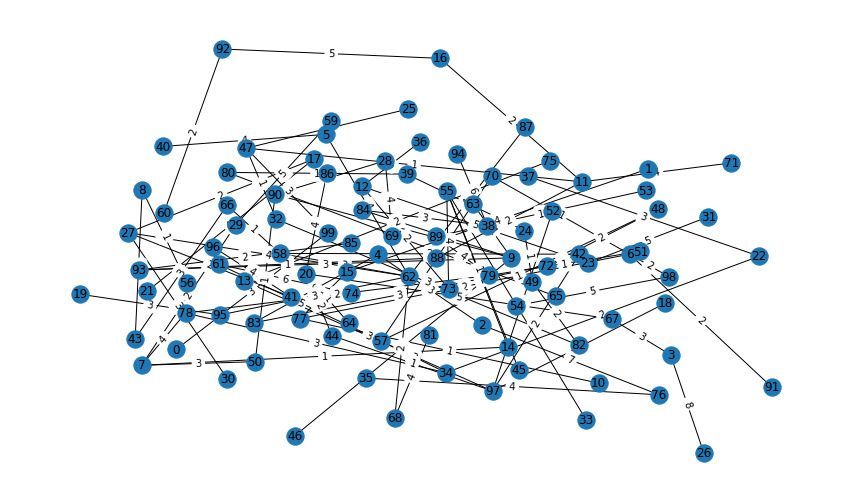

In [7]:
plot_tree(nx.minimum_spanning_tree(big_graph), pos_big)

## Kruskal

In [153]:
def search(parent, i):
    if parent[i]==i:
        return i
    return search(parent, parent[i])


def union(parent, rank, set1, set2):
        root1 = search(parent, set1)
        root2 = search(parent, set2)
        if rank[root1] < rank[root2]:
            parent[root1] = root2
        elif rank[root1] > rank[root2]:
            parent[root2] = root1
        else:
            parent[root2] = root1
            rank[root1] += 1

def mst_kruskal(g):
    T = nx.Graph()
    T.add_nodes_from(g)
    considered_edges, added_nodes = 0, 0
    edges = nx.get_edge_attributes(g,'weight')
    edges = [(k, v) for k, v in sorted(edges.items(), key=lambda item: item[1])]
    parent = list(T.nodes)
    rank = [0]*len(T.nodes)
    while added_nodes<len(T)-1 and considered_edges<len(edges):
        ((u, v), w) = edges[considered_edges]
        considered_edges+=1
        # component of u
        x = search(parent, u)
        # component of v
        y = search(parent, v)
        if x!= y:
            added_nodes+=1
            T.add_weighted_edges_from([(u, v, w)])
            union(parent, rank, x, y)
    return T

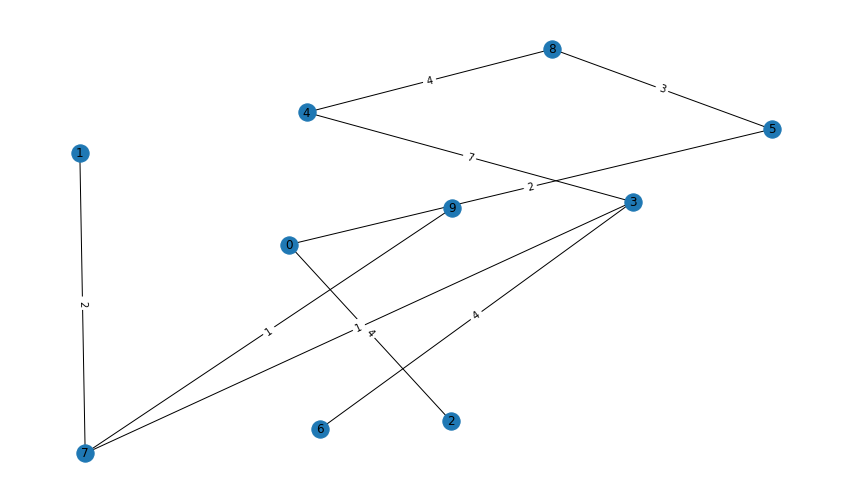

In [168]:
prim_T = mst_kruskal(small_graph)
plot_tree(prim_T, pos_small)

# Prim

In [11]:
import heapq

def mst_prim(g, root=0):
    T = nx.Graph()
    T.add_nodes_from(g)
#     root = np.random.choice(g.nodes)
#     root = 0
    added = set([root])
    edges = nx.get_edge_attributes(g,'weight')
    candidates = g.edges(root)
    candidates = [(edges[min(k), max(k)], (min(k), max(k))) for k in candidates]
    heapq.heapify(candidates)
    
    while len(candidates):
        w, (u, v) = heapq.heappop(candidates)
        new_node = None
        
        if not u in added:
            new_node = u
        elif not v in added:
            new_node = v
        if new_node is not None:
            T.add_weighted_edges_from([(u, v, w)])
            for k in g.edges(new_node):
                if not (k[0] in added or k[1] in added):
                    heapq.heappush(candidates, (edges[min(k), max(k)], (min(k), max(k))))
            added.add(new_node)
            
            
    return T
#     return edges

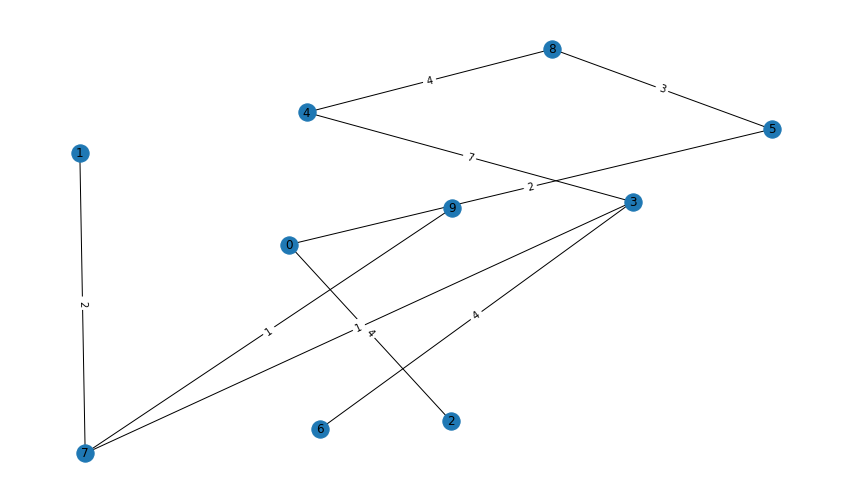

In [12]:
prim_T = mst_prim(small_graph, root=2)
plot_tree(prim_T, pos_small)

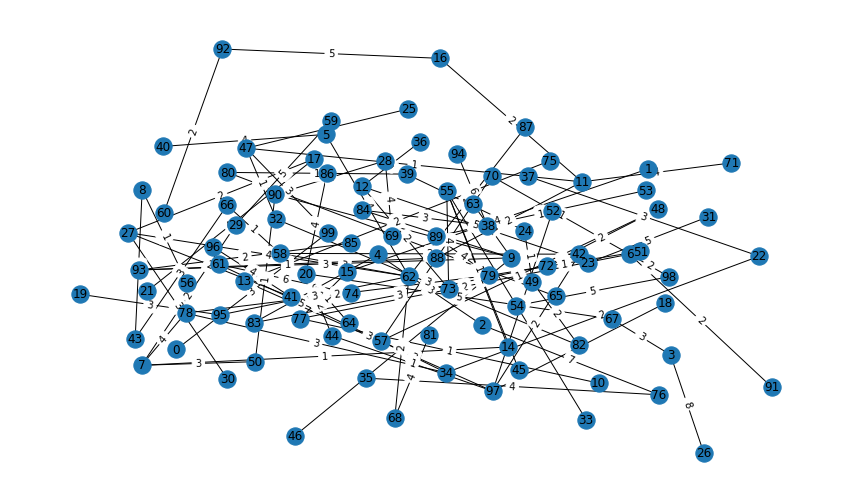

In [13]:
prim_T_ = mst_prim(big_graph, root=2)
plot_tree(prim_T_, pos_big)

# Experiments

In [155]:
from IPython.display import clear_output
import time
from tqdm import tqdm
def run_experiment(algorithm, n_edges_list=range(10, 1000), p = 0.5, n_times=10):
    times = []
    for n in tqdm(n_edges_list):
        G = fast_gnp_random_graph(n, p)
        for u,v,w in G.edges(data=True):
            w['weight'] = np.random.randint(1,15)
        start_time = time.time()
        for _ in range(n_times):
            algorithm(G)
        times.append(time.time()-start_time)
    return times

In [156]:
n_min = 10
n_max = 110
times_kruskal_01 = run_experiment(mst_kruskal, n_edges_list=range(n_min, n_max), p=0.1)

100%|██████████| 100/100 [00:01<00:00, 88.73it/s]


In [157]:
times_prim_01 = run_experiment(mst_prim, n_edges_list=range(n_min, n_max), p=0.1)

100%|██████████| 100/100 [00:02<00:00, 48.18it/s]


In [158]:
times_kruskal_025 = run_experiment(mst_kruskal, n_edges_list=range(n_min, n_max), p=0.25)

100%|██████████| 100/100 [00:02<00:00, 48.44it/s]


In [159]:
times_prim_025 = run_experiment(mst_prim, n_edges_list=range(n_min, n_max), p=0.25)

100%|██████████| 100/100 [00:04<00:00, 24.01it/s]


In [160]:
times_kruskal_05 = run_experiment(mst_kruskal, n_edges_list=range(n_min, n_max), p=0.5)

100%|██████████| 100/100 [00:03<00:00, 26.60it/s]


In [161]:
times_prim_05 = run_experiment(mst_prim, n_edges_list=range(n_min, n_max), p=0.5)

100%|██████████| 100/100 [00:08<00:00, 11.19it/s]


In [162]:
times_kruskal_075 = run_experiment(mst_kruskal, n_edges_list=range(n_min, n_max), p=0.75)

100%|██████████| 100/100 [00:06<00:00, 16.47it/s]


In [163]:
times_prim_075 = run_experiment(mst_prim, n_edges_list=range(n_min, n_max), p=0.75)

100%|██████████| 100/100 [00:14<00:00,  7.12it/s]


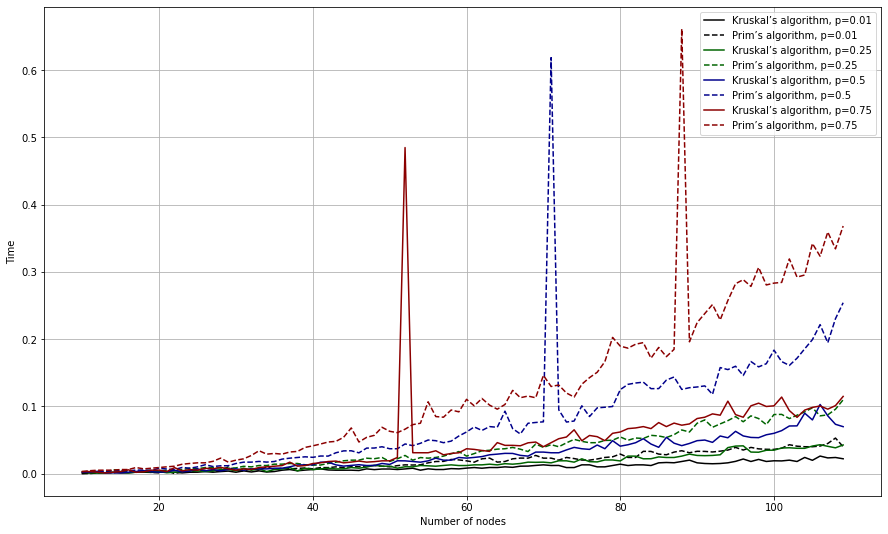

In [164]:
figure = plt.figure(figsize=(15,9))
X_axis = list(range(n_min, n_max))
plt.plot(X_axis, times_kruskal_01, label="Kruskal’s algorithm, p={}".format(0.01), color='black')
plt.plot(X_axis, times_prim_01, label="Prim’s algorithm, p={}".format(0.01), linestyle='--', color='black')
plt.plot(X_axis, times_kruskal_025, label="Kruskal’s algorithm, p={}".format(0.25), color='darkgreen')
plt.plot(X_axis, times_prim_025, label="Prim’s algorithm, p={}".format(0.25), linestyle='--', color='darkgreen')
plt.plot(X_axis, times_kruskal_05, label="Kruskal’s algorithm, p={}".format(0.5), color='darkblue')
plt.plot(X_axis, times_prim_05, label="Prim’s algorithm, p={}".format(0.5), linestyle='--', color='darkblue')
plt.plot(X_axis, times_kruskal_075, label="Kruskal’s algorithm, p={}".format(0.75), color='darkred')
plt.plot(X_axis, times_prim_075, label="Prim’s algorithm, p={}".format(0.75), linestyle='--', color='darkred')

plt.grid()
plt.xlabel('Number of nodes')
plt.ylabel('Time')
plt.legend()

In [72]:
nx_kruskal = lambda G: nx.minimum_spanning_tree(G, algorithm='kruskal')
nx_prim = lambda G: nx.minimum_spanning_tree(G, algorithm='prim')

In [99]:
n_min = 10
n_max = 310
times_kruskal_01_nx = run_experiment(nx_kruskal, n_edges_list=range(n_min, n_max), p=0.1)

100%|██████████| 300/300 [00:29<00:00, 10.09it/s]


In [100]:
times_prim_01_nx = run_experiment(nx_prim, n_edges_list=range(n_min, n_max), p=0.1)

100%|██████████| 300/300 [00:28<00:00, 10.52it/s]


In [101]:
times_kruskal_025_nx = run_experiment(nx_kruskal, n_edges_list=range(n_min, n_max), p=0.25)

100%|██████████| 300/300 [01:39<00:00,  3.03it/s]


In [102]:
times_prim_025_nx = run_experiment(nx_prim, n_edges_list=range(n_min, n_max), p=0.25)

100%|██████████| 300/300 [01:28<00:00,  3.37it/s]


In [103]:
times_kruskal_05_nx = run_experiment(nx_kruskal, n_edges_list=range(n_min, n_max), p=0.5)

100%|██████████| 300/300 [03:41<00:00,  1.36it/s]


In [104]:
times_prim_05_nx = run_experiment(nx_prim, n_edges_list=range(n_min, n_max), p=0.5)

100%|██████████| 300/300 [03:19<00:00,  1.51it/s]


In [105]:
times_kruskal_075_nx = run_experiment(nx_kruskal, n_edges_list=range(n_min, n_max), p=0.75)

100%|██████████| 300/300 [05:55<00:00,  1.18s/it]


In [106]:
times_prim_075_nx = run_experiment(nx_prim, n_edges_list=range(n_min, n_max), p=0.75)

100%|██████████| 300/300 [05:53<00:00,  1.18s/it]


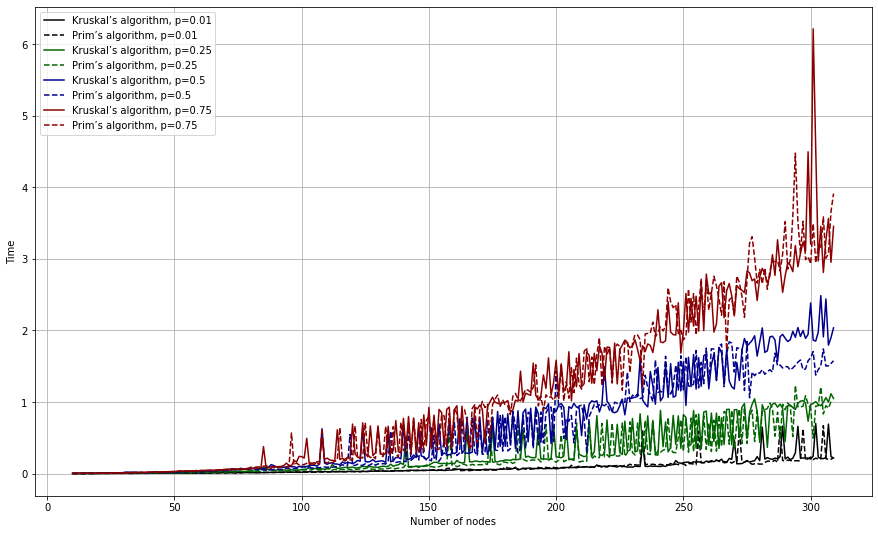

In [107]:
figure = plt.figure(figsize=(15,9))
X_axis = list(range(n_min, n_max))
plt.plot(X_axis, times_kruskal_01_nx, label="Kruskal’s algorithm, p={}".format(0.01), color='black')
plt.plot(X_axis, times_prim_01_nx, label="Prim’s algorithm, p={}".format(0.01), linestyle='--', color='black')
plt.plot(X_axis, times_kruskal_025_nx, label="Kruskal’s algorithm, p={}".format(0.25), color='darkgreen')
plt.plot(X_axis, times_prim_025_nx, label="Prim’s algorithm, p={}".format(0.25), linestyle='--', color='darkgreen')
plt.plot(X_axis, times_kruskal_05_nx, label="Kruskal’s algorithm, p={}".format(0.5), color='darkblue')
plt.plot(X_axis, times_prim_05_nx, label="Prim’s algorithm, p={}".format(0.5), linestyle='--', color='darkblue')
plt.plot(X_axis, times_kruskal_075_nx, label="Kruskal’s algorithm, p={}".format(0.75), color='darkred')
plt.plot(X_axis, times_prim_075_nx, label="Prim’s algorithm, p={}".format(0.75), linestyle='--', color='darkred')

plt.grid()
plt.xlabel('Number of nodes')
plt.ylabel('Time')
plt.legend()